# Outliers in Pandas
Outliers are data points that significantly deviate from the majority of the dataset. They can occur due to variability in data, measurement errors, or other factors. Detecting and handling outliers is crucial in data analysis because they can skew statistical results, affect model accuracy, and provide important insights.

### Characteristics of Outliers

- Extreme Values: Data points that are unusually high or low compared to the rest of the data.
- Skewed Distribution: Outliers can cause data to become non-normally distributed.
- Impact on Metrics: Mean, variance, and standard deviation are particularly sensitive to outliers.

In [18]:
#Step 1: Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization aesthetics
sns.set(style="whitegrid")


In [16]:

# Load the Titanic dataset from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_titanic = pd.read_csv(url)

# Display the first few rows
display(df_titanic.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Step 3: Understanding the Dataset
# Get summary of the dataset
display(df_titanic.info())

# Get statistical summary of numerical columns
display(df_titanic.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 4: Visualizing Outliers
Visualization is a powerful tool to detect outliers. We will use boxplots and scatter plots to identify outliers in numerical variables.

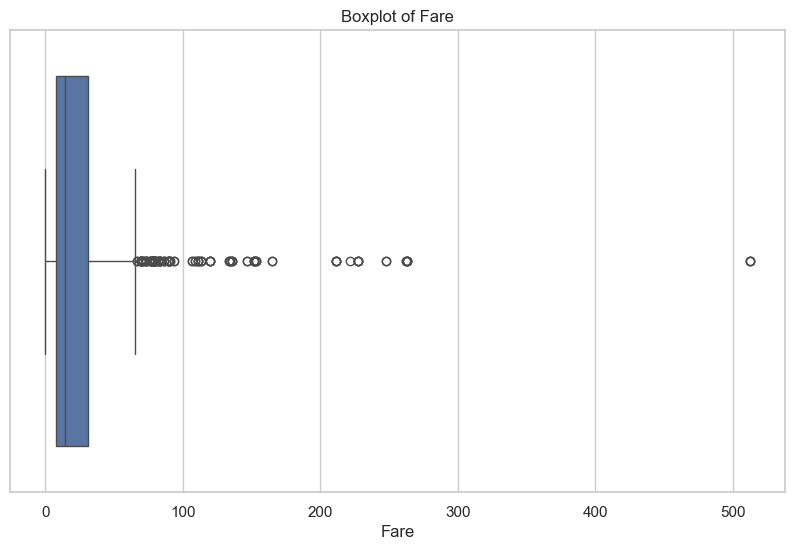

In [20]:
# Boxplot for Fare
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_titanic['Fare'])
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()


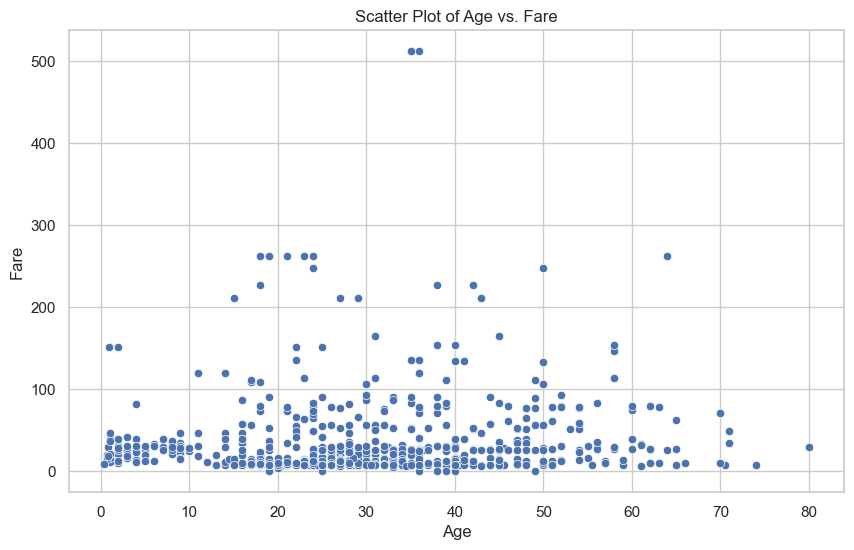

In [21]:
# Scatter plot of Age vs. Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df_titanic)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


### Step 5: Statistical Methods for Outlier Detection
- 5.1 Interquartile Range (IQR) Method

    * The IQR method identifies outliers by calculating the range between the first quartile (Q1) and the third quartile (Q3). 
    
    * Any data point below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.

- Steps:

    * Calculate Q1 (25th percentile) and Q3 (75th percentile).

    * Compute IQR = Q3 - Q1.
    
    * Determine the lower bound: Q1 - 1.5 * IQR.
    
    * Determine the upper bound: Q3 + 1.5 * IQR.
    
    * Identify data points outside these bounds.

In [22]:
# Calculate Q1 and Q3
Q1 = df_titanic['Fare'].quantile(0.25)
Q3 = df_titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outliers = df_titanic[(df_titanic['Fare'] < lower_bound) | (df_titanic['Fare'] > upper_bound)]
print(f"Number of outliers in Fare: {outliers.shape[0]}")


Q1: 7.9104
Q3: 31.0
IQR: 23.0896
Lower Bound: -26.724
Upper Bound: 65.6344
Number of outliers in Fare: 116


### 5.2 Z-Score Method

The Z-score method measures how many standard deviations a data point is from the mean. Typically, a Z-score above 3 or below -3 is considered an outlier.

#### Steps:
1. **Calculate the mean** and **standard deviation** of the dataset.
2. **Compute the Z-score** for each data point using the formula:

   $$ Z = \frac{X - \mu}{\sigma} $$

   Where:
   - \( X \) is the data point,
   - \( \mu \) is the mean of the dataset,
   - \( \sigma \) is the standard deviation of the dataset.

3. **Identify data points** with \( |Z| > 3 \), as these are considered outliers.


In [23]:
# Drop missing values in 'Age'
age = df_titanic['Age'].dropna()

# Calculate the mean and standard deviation
mean_age = age.mean()
std_age = age.std()

# Calculate Z-scores manually
z_scores = (age - mean_age) / std_age

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers_z = age[(z_scores > 3) | (z_scores < -3)]

print(f"Number of outliers in Age: {outliers_z.shape[0]}")
print(outliers_z)

Number of outliers in Age: 2
630    80.0
851    74.0
Name: Age, dtype: float64


## Step 6: Handling Outliers

Once outliers are detected, you have several options to handle them:

- **Removal**: Exclude outliers from the dataset.
- **Transformation**: Apply mathematical transformations to reduce the impact of outliers.
- **Imputation**: Replace outliers with a more reasonable value (e.g., mean or median).

### 6.1 Removing Outliers Using IQR

Let's remove outliers in the **Fare** column using the **IQR (Interquartile Range)** method. 

In [24]:
# Remove outliers based on Fare
df_cleaned = df_titanic[(df_titanic['Fare'] >= lower_bound) & (df_titanic['Fare'] <= upper_bound)]

print(f"Original dataset size: {df_titanic.shape}")
print(f"Dataset size after removing Fare outliers: {df_cleaned.shape}")


Original dataset size: (891, 12)
Dataset size after removing Fare outliers: (775, 12)


### 6.2 Transforming Data Using Log Transformation

Transforming data can reduce the skewness caused by outliers. 

A common transformation is the **logarithmic transformation**, which is especially useful when data is positively skewed. The log transformation helps to compress the scale of larger values and brings the data closer to a normal distribution.


/var/folders/xm/dtk1g2nx457gfkp94_xvn6bm0000gn/T/ipykernel_49592/63363736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Fare_log'] = np.log1p(df_cleaned['Fare'])  # log1p handles zero values


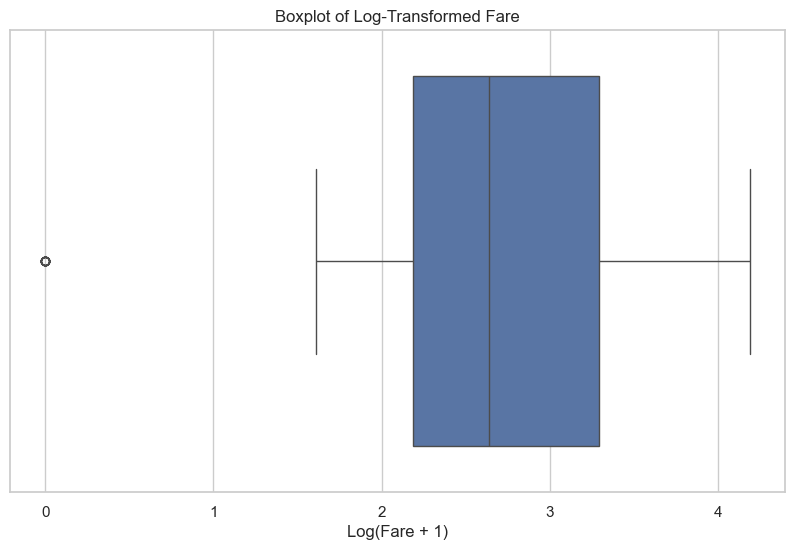

In [25]:
# Apply log transformation to Fare
df_cleaned['Fare_log'] = np.log1p(df_cleaned['Fare'])  # log1p handles zero values

# Visualize the transformed Fare
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Fare_log'])
plt.title('Boxplot of Log-Transformed Fare')
plt.xlabel('Log(Fare + 1)')
plt.show()

### 6.3 Imputing Outliers
Instead of removing outliers, you can replace them with the median or mean.

In [29]:
# Calculate median age
median_age = df_titanic['Age'].median()

# Replace outliers with median
df_titanic['Age_cleaned'] = df_titanic['Age']

# Calculate Z-scores 
mean_age = df_titanic['Age'].mean()
std_age = df_titanic['Age'].std()

z_scores_age = (df_titanic['Age'] - mean_age) / std_age

# Replace outliers based on Z-score threshold
df_titanic.loc[(z_scores_age > 3) | (z_scores_age < -3), 'Age_cleaned'] = median_age

print(df_titanic[['Age', 'Age_cleaned']].head())


    Age  Age_cleaned
0  22.0         22.0
1  38.0         38.0
2  26.0         26.0
3  35.0         35.0
4  35.0         35.0
